In [92]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tqdm import tqdm

In [93]:
from darts.models import RNNModel
from darts import TimeSeries

In [94]:
df = pd.read_csv(f'../data/MSFT/2018-10-01 - 2021-10-02.csv', index_col=0, parse_dates=['time'])
df.head()

,figi,interval,o,c,h,l,v,time
0,BBG000BPH459,15min,115.02,115.20,115.20,115.02,9,2018-10-01 07:00:00+00:00
1,BBG000BPH459,15min,115.20,115.20,115.20,115.20,3,2018-10-01 07:30:00+00:00
2,BBG000BPH459,15min,115.19,115.19,115.19,115.19,1,2018-10-01 07:45:00+00:00
3,BBG000BPH459,15min,115.20,115.41,115.44,115.20,17,2018-10-01 08:00:00+00:00
4,BBG000BPH459,15min,115.42,115.15,115.43,115.15,12,2018-10-01 08:15:00+00:00


In [95]:
data = df.filter('c')

test_size = 74
train_df = data[:-test_size]
test_df = data[-test_size:]

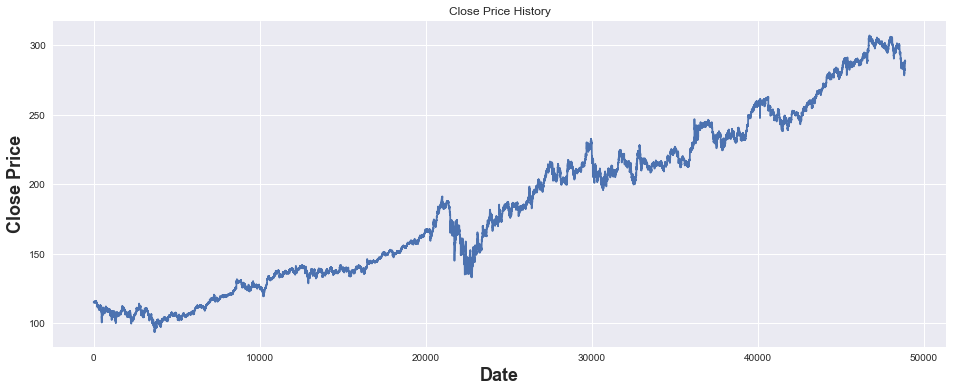

In [96]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['c'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [97]:
model = RNNModel(model='LSTM')

In [98]:
train_df = TimeSeries.from_values(train_df.values)

In [101]:
%%time

model.fit(train_df, verbose=True)

[2021-10-06 17:09:36,270] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 48794 samples.
[2021-10-06 17:09:36,270] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 48794 samples.


  0%|          | 0/100 [00:00<?, ?it/s]

Wall time: 33min 53s2


In [105]:
prediction = model.predict(len(test_df)).pd_series()
prediction

time
48818    281.489204
48819    281.538325
48820    281.622216
48821    281.697026
48822    281.762988
            ...    
48887    260.011755
48888    259.455976
48889    258.897732
48890    258.337509
48891    257.775839
Length: 74, dtype: float64

In [106]:
train = data[:-test_size]
valid = data[-test_size:]
valid['Predicted'] = prediction.copy()
valid

C:\Users\spark\AppData\Local\Temp/ipykernel_472/2233431604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted'] = prediction.copy()


,c,Predicted
48818,281.03,281.489204
48819,280.64,281.538325
48820,280.60,281.622216
48821,280.99,281.697026
48822,280.80,281.762988
...,...,...
48887,288.55,260.011755
48888,288.44,259.455976
48889,288.56,258.897732
48890,288.56,258.337509


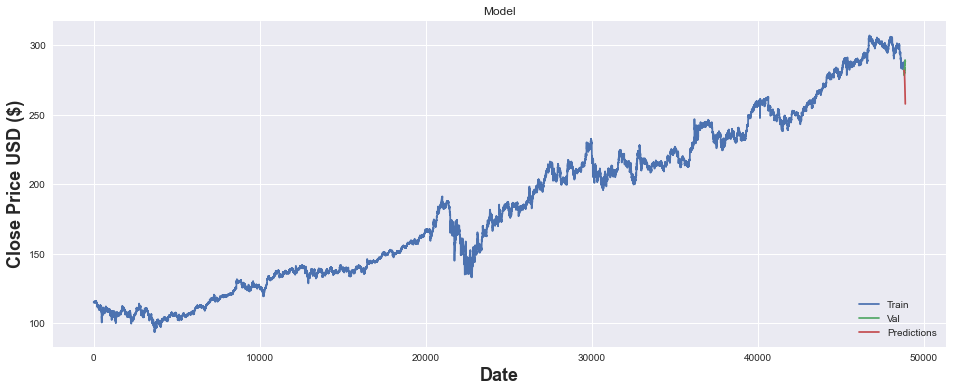

In [107]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c', 'Predicted']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

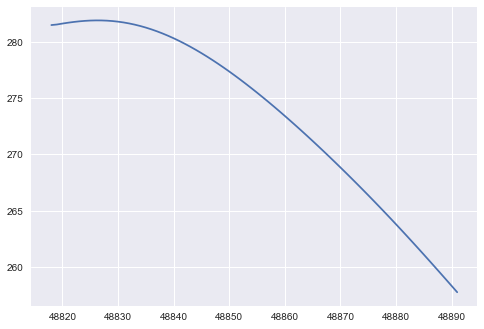

In [109]:
plt.plot(prediction)
plt.show()

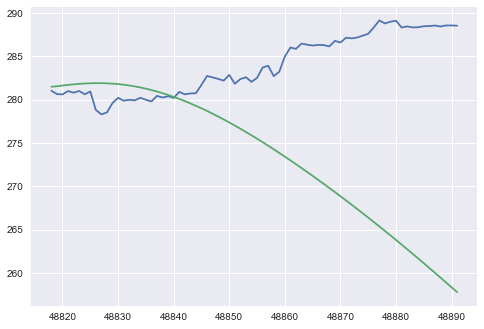

In [111]:
plt.plot(valid)
plt.show()